# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1

lat = []
temp = []
humidity = []
clouds = []
wind = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] != '404':
        print("Processing Record " + str(count) + " of Set 1 | " + city)
        #print(f"The weather API responded with: {response}.")
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp']) 
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        count = count + 1
    

Processing Record 1 of Set 1 | tandalti
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | mwene-ditu
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | perth
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | san quintin
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | havelock
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | tsumeb
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | areka
Processing Record 21 of Set 1 | chuka
Processing Record 22 of Set 1 | valparaiso
Processing Record 23 of Set 1 | lafiagi
Processing Record 24 of Set 1 | colares
Processing Record 25 o

Processing Record 198 of Set 1 | bonavista
Processing Record 199 of Set 1 | tuktoyaktuk
Processing Record 200 of Set 1 | tuatapere
Processing Record 201 of Set 1 | martapura
Processing Record 202 of Set 1 | souillac
Processing Record 203 of Set 1 | brumado
Processing Record 204 of Set 1 | bandarbeyla
Processing Record 205 of Set 1 | saint-philippe
Processing Record 206 of Set 1 | deep river
Processing Record 207 of Set 1 | xiaoshi
Processing Record 208 of Set 1 | cabo san lucas
Processing Record 209 of Set 1 | carnarvon
Processing Record 210 of Set 1 | vagur
Processing Record 211 of Set 1 | volkhov
Processing Record 212 of Set 1 | hervey bay
Processing Record 213 of Set 1 | nabire
Processing Record 214 of Set 1 | nerchinskiy zavod
Processing Record 215 of Set 1 | inhambane
Processing Record 216 of Set 1 | kusti
Processing Record 217 of Set 1 | codrington
Processing Record 218 of Set 1 | kaitangata
Processing Record 219 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 220 of Set 1

Processing Record 392 of Set 1 | kiruna
Processing Record 393 of Set 1 | nalut
Processing Record 394 of Set 1 | praia da vitoria
Processing Record 395 of Set 1 | mastic beach
Processing Record 396 of Set 1 | hurghada
Processing Record 397 of Set 1 | mogadishu
Processing Record 398 of Set 1 | palmer
Processing Record 399 of Set 1 | kita
Processing Record 400 of Set 1 | valence
Processing Record 401 of Set 1 | mitu
Processing Record 402 of Set 1 | kimbe
Processing Record 403 of Set 1 | whyalla
Processing Record 404 of Set 1 | jackson
Processing Record 405 of Set 1 | rio gallegos
Processing Record 406 of Set 1 | hammerfest
Processing Record 407 of Set 1 | meadow lake
Processing Record 408 of Set 1 | souroti
Processing Record 409 of Set 1 | flinders
Processing Record 410 of Set 1 | rundu
Processing Record 411 of Set 1 | straumen
Processing Record 412 of Set 1 | normandin
Processing Record 413 of Set 1 | fortuna
Processing Record 414 of Set 1 | markova
Processing Record 415 of Set 1 | la sa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "wind": wind
}
print (len(wind))
#weather_data = pd.DataFrame.from_dict(weather_dict)
weather_data = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in weather_dict.items() ]))
#weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')
#weather_data.transpose()
weather_data.to_csv('weather.csv', index=False,header=True, encoding='utf-8')
weather_data

554


,city,lat,temp,humidity,clouds,wind
0,tandalti,13.0167,89.85,30.0,73.0,12.55
1,ancud,-41.8697,55.06,72.0,75.0,11.50
2,mwene-ditu,-7.0000,67.05,95.0,92.0,5.82
3,tsihombe,-33.0153,64.40,88.0,0.0,5.75
4,east london,-54.8000,55.40,58.0,75.0,12.66
...,...,...,...,...,...,...
595,tiznit,NaN,NaN,NaN,NaN,NaN
596,asuncion nochixtlan,NaN,NaN,NaN,NaN,NaN
597,panama city,NaN,NaN,NaN,NaN,NaN
598,masuguru,NaN,NaN,NaN,NaN,NaN


In [22]:
weather_data.describe()

,lat,temp,humidity,clouds,wind
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,19.228557,62.205325,67.433213,54.851986,8.393574
std,33.135593,20.027496,23.964487,37.020200,5.488897
min,-54.800000,-15.030000,4.000000,0.000000,0.560000
25%,-8.736100,48.112500,53.000000,20.000000,4.345000
50%,22.728800,65.255000,73.000000,64.500000,7.050000
75%,46.277300,78.402500,87.000000,90.000000,11.500000
max,78.218600,103.750000,100.000000,100.000000,29.930000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
humidity_greater_100 = (weather_data["humidity"] > 100)[weather_data["city"]].unique()
print(humidity_greater_100)

[nan]


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\vasu0\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


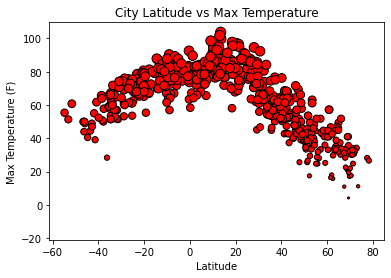

In [30]:
lat = weather_data.iloc[:,1]
temp = weather_data.iloc[:,2]
plt.scatter(lat, temp, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

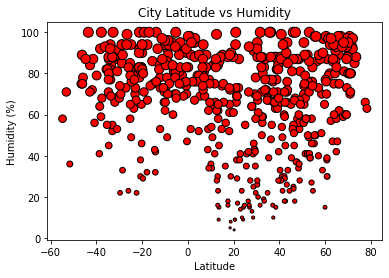

In [31]:
lat = weather_data.iloc[:,1]
humidity = weather_data.iloc[:,3]
plt.scatter(lat, humidity, marker="o", facecolors="red"
           , edgecolors="black", s=humidity)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

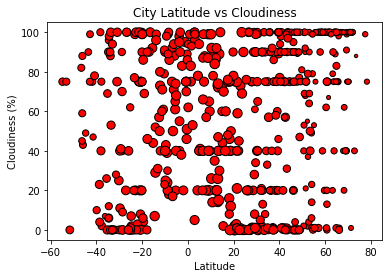

In [32]:
lat = weather_data.iloc[:,1]
clouds = weather_data.iloc[:,4]
plt.scatter(lat, clouds, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

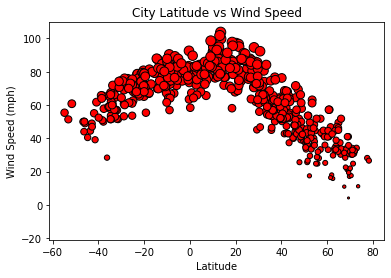

In [33]:
lat = weather_data.iloc[:,1]
wind = weather_data.iloc[:,5]
plt.scatter(lat, temp, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


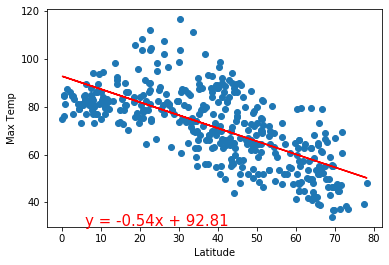

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


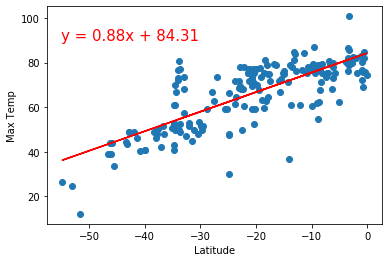

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


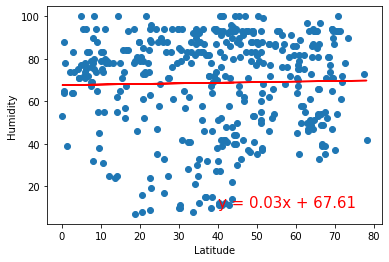

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


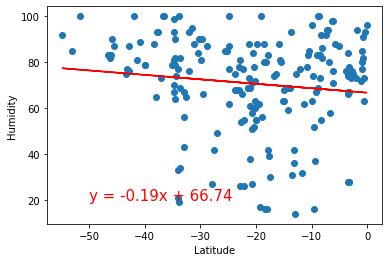

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


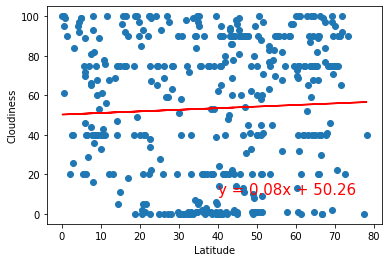

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


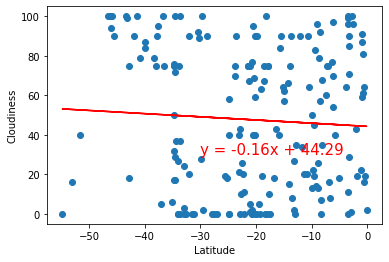

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


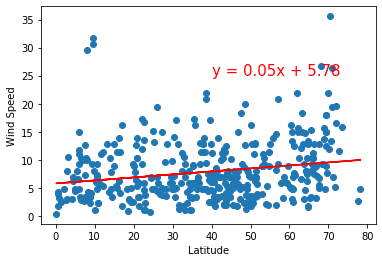

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


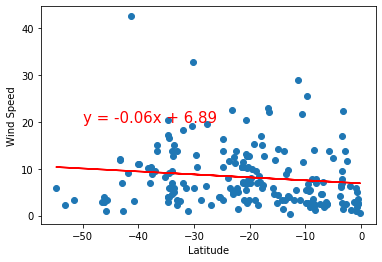